In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('results.csv')
idle_time = data['idle time %'].values
avg_speed = data['avg speed'].values

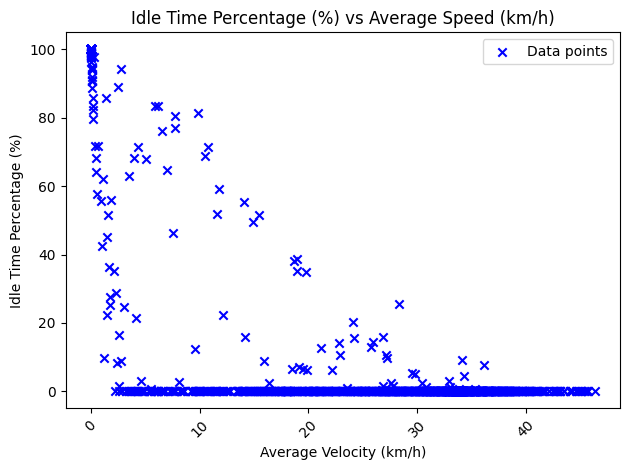

In [3]:
plt.scatter(avg_speed, idle_time, c='blue', marker='x', label='Data points')
plt.xlabel('Average Velocity (km/h)')
plt.ylabel('Idle Time Percentage (%)')
plt.title('Idle Time Percentage (%) vs Average Speed (km/h)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:
kmeans = KMeans(n_clusters=4)  # Adjust the number of clusters
data_for_clustering = np.column_stack((idle_time, avg_speed))
kmeans_labels = kmeans.fit_predict(data_for_clustering)

c:\Users\kiran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


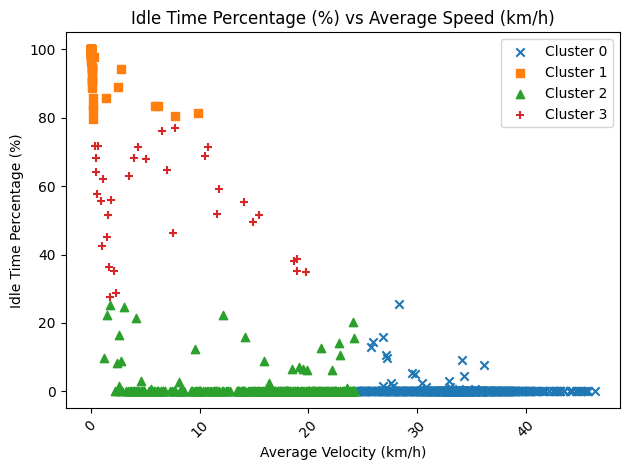

In [5]:
markers = ['x', 's', '^', '+']

for cluster_label in set(kmeans_labels):
    cluster_data = [(avg_speed[i], idle_time[i]) for i, label in enumerate(kmeans_labels) if label == cluster_label]
    cluster_avg_speed, cluster_idle_time = zip(*cluster_data)
    plt.scatter(cluster_avg_speed, cluster_idle_time, label=f'Cluster {cluster_label}', marker=markers[cluster_label])

plt.xlabel('Average Velocity (km/h)')
plt.ylabel('Idle Time Percentage (%)')
plt.title('Idle Time Percentage (%) vs Average Speed (km/h)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()